Các thuật ngữ trong bài

* Tích cực: Positive
* Tiêu cực: Negative
* Nhân tử Lagrange: Lagrange multiplier
* Phương pháp hạ dốc: gradient descent
* Hệ số học tập: learning rate


# 1. Bài toán phân loại

## 1.1. Một số bài toán phân loại phổ biến

Trong lớp các mô hình học có giám sát (_supervised learning_) thì có hai bài toán chính là bài toán dự báo (đối với biến mục tiêu liên tục) và bài toán phân loại (đối với biến mục tiêu là rời rạc). Chúng ta đã được tìm hiểu về [bài toán dự báo và mô hình hồi qui tuyến tính](https://phamdinhkhanh.github.io/deepai-book/ch_ml/index_prediction.html) ở bài trước. Trong bài này chúng ta sẽ tiếp tục tìm hiểu về bài toán phân loại và mô hình hồi qui logistic.

**Sơ bộ về bài toán phân loại**

Bài toán phân loại là lớp bài toán được ứng dụng phổ biến nhất trong machine learning. Có rất nhiều các tác vụ mà chúng ta có thể kể đến liên quan tới lớp bài toán phân loại:

* **Phân loại nợ xấu trong ngân hàng:** Danh mục _banking book_ của ngân hàng luôn tồn tại những rủi ro. Các khoảng vay tiềm ẩn những nguy cơ vỡ nợ nên các ngân hàng cần phải đánh giá rủi ro đối với khách hàng của mình thông qua các mô hình phân loại nợ xấu để ra quyết định có _cho vay hay không_ và vay với _hạn mức, kỳ hạn, lãi suất_ là bao nhiêu? Sự khác biệt về sức khoẻ tín dụng giữa các ngân hàng được đánh giá trên khả năng kiểm soát nợ xấu. Để tạo ra một hệ thống quản trị rủi ro hiệu quả thì bên cạnh những biện pháp về phòng ngừa và tuân thủ, ngân hàng cần sử dụng các công cụ mô hình để lượng hoá rủi ro khách hàng.

* **Phát hiện đầu cơ và gian lận trong thương mại điện tử (viết tắt TMĐT)**: Đầu cơ và gian lận là hiện tượng phổ biến trong lĩnh vực TMĐT. Đầu cơ là việc khách hàng mua vượt quá số lượng cho phép và bán ra thị trường với giá cao hơn nhằm hưởng lợi. Một số hành vi gian lận khác gây hậu quả nghiêm trọng cho sàn TMĐT đó là cửa hàng lợi dụng chính sách thưởng doanh số để nhận hoa hoa hồng, khách hàng gian lận để hưởng khuyến mãi,.... Cả hai hành vi đầu cơ và gian lận gây đều gây thâm dụng vốn cho các sàn TMĐT. Xây dựng được một hệ thống phát hiện gian lận sẽ giúp sàn TMĐT hoạt động hiệu quả, tối ưu hoá được ngồn lực về vốn và mở rộng tập khách hàng để tạo ra những lợi thế cạnh tranh trên thị trường.

* **Phân loại bệnh trong y sinh**: Đây là một trong những lĩnh vực có nhiều tiềm năng phát triển và giúp giải quyết các vấn đề liên quan đến sức khoẻ con người. Trong y sinh một số mô hình phân loại giúp cho chúng ta đưa ra các chuẩn đoán bệnh dựa trên các chỉ số xét nghiệm đầu vào sơ bộ như huyết áp, đường huyết, hồng cầu, bạch cầu, tiểu cầu,.... Bên cạnh đó xử lý ảnh trong y sinh cũng là một lĩnh vực có tính ứng dụng cao. Các mô hình thị giác máy tính có thể đưa ra những khuyến nghị cho bác sĩ về vị trí, kích thước và loại khối u. Bạn đọc quan tâm tới lĩnh vực này có thể tham khảo cuộc thi [VinBigData Chest X-ray Abnormalities Detection
](https://www.kaggle.com/c/vinbigdata-chest-xray-abnormalities-detection).
 
Bên trên là một vài ứng dụng nhỏ để bạn đọc hình dung rõ hơn về tính hữu ích và sự phổ biến của các bài toán phân loại trong học có giám sát? Có thể thấy rằng bài toán phân loại hiện tại đang giải quyết rất nhiều vấn đề mà con người đang phải đối mặt. Đồng thời với vai trò to lớn của mình, nó đã và đang mang lại nhiều thay đổi cho nhân loại. Với sự bùng nổ về thuật toán, năng lực tính toán và sự dồi dào của dữ liệu. Ngày càng có nhiều ứng dụng của mô hình phân loại đạt độ chính xác ở mức con người hay thậm chí là vượt trội và thay thế con người trong nhiều tác vụ khác nhau.

Trong chương này chúng ta sẽ cùng tìm hiểu một mô hình phân loại khá phổ biến trong machine learning. Đó là mô hình Logistic Regression trong **phân loại nhị phân** của học có giám sát.

## 1.2. Thế nào là phân loại nhị phân?

Phân loại nhị phân là bài toán phân loại có biến mục tiêu gồm hai nhãn $\{0, 1\}$. Trong đó nhãn 1 là tích cực (_positive_) và nhãn 0 là tiêu cực (_negative_). Nhãn _tích cực_ ở đây hàm chứa ý nghĩa xảy ra sự kiện và _tiêu cực_ là sự vắng mặt của sự kiện. Mục tiêu của phân loại nhị phân là dự báo xác suất xảy ra hoặc vắng mặt của sự kiện lần lượt tương ứng với nhãn 1 và 0. Tổng của hai xác suất này bằng 1:

$$P(y=1|\mathbf{x}; \mathbf{w}) + P(y=0|\mathbf{x}; \mathbf{w})=1$$

Trong công thức trên thì $P(y=1|\mathbf{x})$ là xác suất có điều kiện, nó thể hiện xác suất của _tích cực_ tại một quan sát $\mathbf{x}$ ứng với một mô hình cụ thể có trọng số $\mathbf{w}$. Giá trị của xác suất này nằm trong khoảng $[0, 1]$. Chính vì thế trong hồi qui Logisitic chúng ta sẽ đề xuất một hàm giả thuyết $0 \leq h_{\mathbf{w}}(\mathbf{x}) \leq 1$ để dự báo xác suất. Hàm này là hàm Sigmoid hoặc tên gọi khác là hàm Logistic mà chúng ta sẽ tìm hiểu ở mục sau.

## 1.2. Tại sao không phân loại dựa trên hồi qui tuyến tính ?

**Câu hỏi ngây ngô nhưng hợp lý**

Chúng ta thường thắc mắc rằng xác suất là một biến liên tục, như vậy mô hình hồi qui tuyến tính hoàn toàn có thể được sử dụng để dự báo xác suất. Nhưng tại sao không sử dụng mô hình hồi qui tuyến tính trong bài toán phân loại?

Có nhiều nguyên nhân khiến cho mô hình hồi qui tuyến tính không hoạt động tốt trên các tác vụ phân loại trong học có giám sát. Đó là:

1. Mô hình hồi qui tuyến tính có thể dự báo các giá trị nằm ngoài khoảng [0, 1]. Do đó nó không phù hợp để biểu diễn một xác suất của một sự kiện. 

Thật vậy: Giả sử chúng ta cần xây dựng một mô hình dự báo nợ xấu cho biến $\mathbf{y}$ (nhãn 0 là bình thường, nhãn 1 là nợ xấu). Các giá trị đầu vào bao gồm hai biến $\mathbf{x}_1$ là giá trị khoản vay, và $\mathbf{x}_2$ là tiền lương như sau:

$\mathbf{x}_1 = [125, 140, 175, 180, 180, 200, 225, 245, 270, 280, 120, 100, 90, 85, 80, 80, 70, 50, 50, 40]$


$\mathbf{x}_2 = [15, 18, 20, 25, 25, 25, 27, 30, 32, 35, 45, 50, 50, 55, 55, 55, 60, 70, 80, 90]$

$\mathbf{y} = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]$

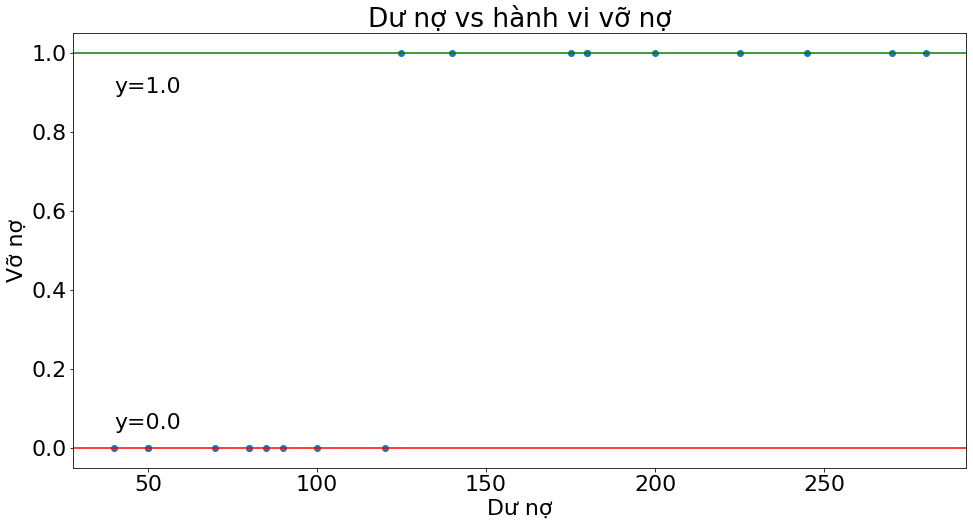

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

import numpy as np

x1 = np.array([[125, 140, 175, 180, 180, 200, 225, 245, 270, 280, 120, 100, 90, 85, 80, 80, 70, 50, 50, 40]])
x2 = np.array([[15, 18, 20, 25, 25, 25, 27, 30, 32, 35, 45, 50, 50, 55, 55, 55, 60, 70, 80, 90]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

def _plot(x, y, title="", xlabel="", ylabel=""):
  plt.figure(figsize = (16, 8))
  plt.scatter(x, y, marker = 'o')
  x_min = np.min(x)
  plt.axhline(1, color="green")
  plt.text(x_min, 0.9, "y=1.0")
  plt.axhline(0, color="red")
  plt.text(x_min, 0.05, "y=0.0")
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()

_plot(x1, y, 
      title="Dư nợ vs hành vi vỡ nợ",
      xlabel="Dư nợ",
      ylabel="Vỡ nợ")

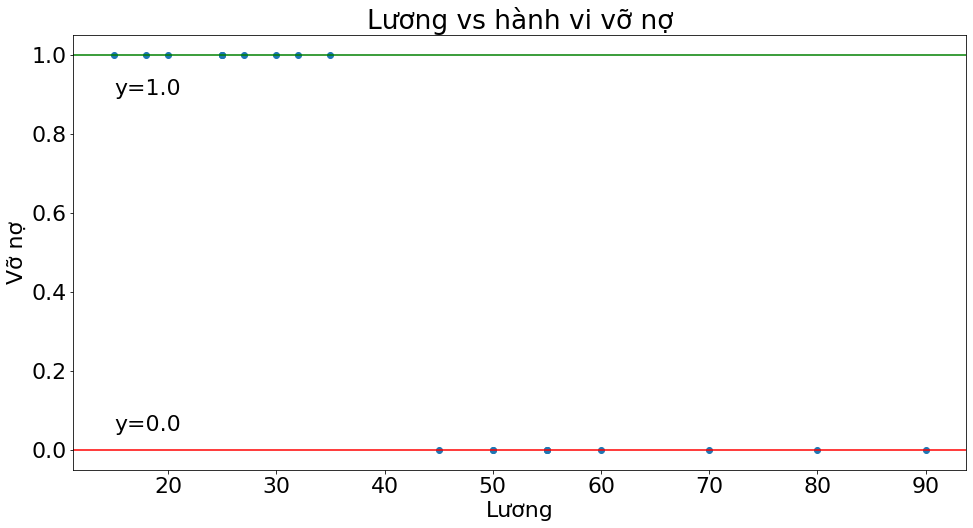

In [ ]:
_plot(x2, y, 
      title="Lương vs hành vi vỡ nợ",
      xlabel="Lương",
      ylabel="Vỡ nợ")

Như vậy ta có thể thấy khi lương càng thấp thì khả năng vỡ nợ càng cao và khi dư nợ càng thấp thì khả năng vỡ nợ càng thấp. Tiếp theo chúng ta xây dựng mô hình hồi qui tuyến tính và dự báo để kiểm chứng miền biến của giá trị dự báo $\hat{y}$.

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression(fit_intercept=True) # fit_intercept = False for calculating the bias

X = np.concatenate([x1, x2], axis = 0).T
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Dự báo giá trị của $y$ và biểu đồ hoá giá trị dự báo

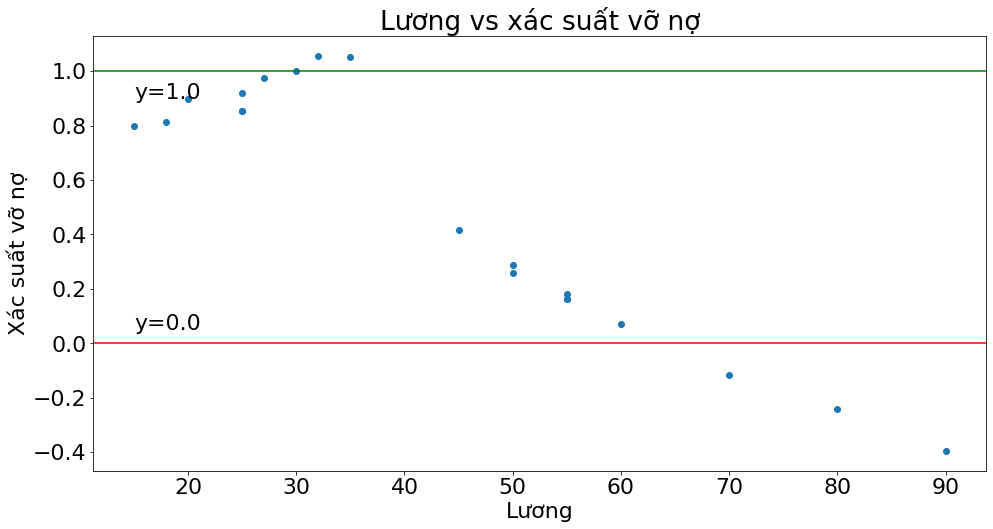

In [ ]:
# Dự báo giá nhà ngay trên tập train
ypred = regr.predict(X)

# Đồ thị hoá 
_plot(x2, ypred, 
      title="Lương vs xác suất vỡ nợ",
      xlabel="Lương",
      ylabel="Xác suất vỡ nợ")

Như vậy có một số giá trị đã vượt ngoài khoảng xác suất là $[0, 1]$ như đồ thị ở hình trên.

Ngoài ra mô hình hồi qui tuyến tính quá đơn giản để phân chia tốt các nhóm dữ liệu và đồng thời hồi qui tuyến tính rất nhạy cảm với dữ liệu outliers là những nguyên nhân khác khiến cho nó dường như là không được sử dụng nhiều cho mục đích phân loại (mặc dù trên thực tế chúng vẫn có khả năng phân loại).

# 2. Hồi qui Logistic

Các mô hình phân loại đều tìm cách xác định một đường biên phân chia tốt nhất các nhóm giữa liệu. Trong hồi qui logistic chúng ta cũng tìm kiếm một đường biên phân chia như vậy để phân loại tốt nhóm 0 và 1.

![](https://i.imgur.com/pVWaYTt.jpeg)

Trong hồi qui tuyến tính chúng ta đưa ra một hàm hồi qui giả thuyết $h_{\mathbf{w}}(\mathbf{x}) = \mathbf{w}^{\intercal}\mathbf{x}$ để dự báo biến mục tiêu $y$. Giá trị của chúng có thể vượt ngoài khoảng $[0, 1]$ nên trong hồi qui Logistic cần một hàm số để ràng buộc giá trị đầu ra nằm trong khoảng $[0, 1]$ và đồng thời tạo ra tính phi tuyến cho phương trình hồi qui nhằm giúp nó có đường biên phân chia giữa hai nhóm tốt hơn. Đó chính là hàm Sigmoid hoặc hàm Logistic mà chúng ta sẽ tìm hiểu bên dưới.



## 2.1. Hàm sigmoid

Mô hình hồi qui _Logistic_ là sự tiếp nối ý tưởng của hồi qui tuyến tính vào các bài toán phân loại. Từ đầu ra của hàm tuyến tính chúng ta đưa vào hàm _Sigmoid_ để tìm ra phân phối xác suất của dữ liệu. Hàm _Sigmoid_ có công thức:

$$\sigma{(x)} = \frac{1}{1+e^{-x}}$$

Bên dưới là khảo sát sơ bộ của hàm _Sigmoid_.

In [ ]:
import numpy as np

x = np.linspace(-10, 10, 200)

def _sigmoid(x):
  s = 1/(1+np.exp(-x))
  return s

# Xác suất dự báo từ hàm sigmoid
y = [_sigmoid(xi) for xi in x]

Vẽ đồ thị hàm _Sigmoid_:

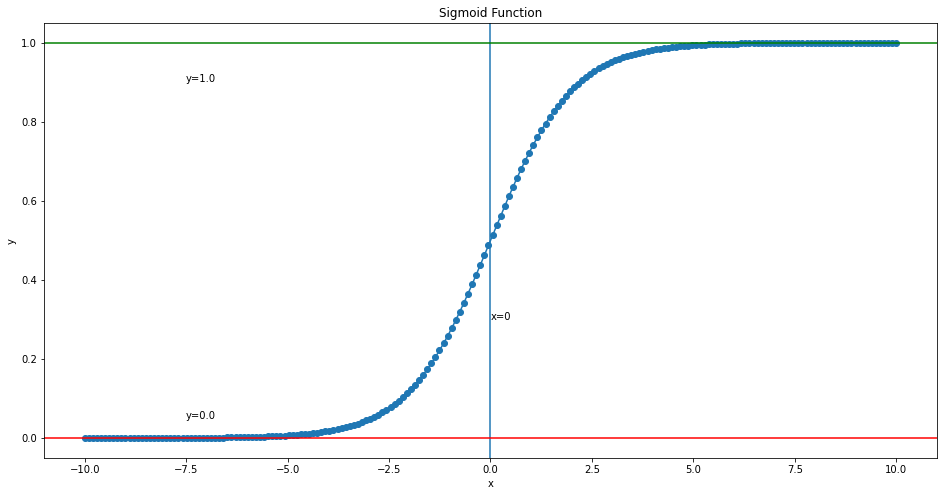

In [ ]:
# Visualize hàm sigmoid
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 8))
plt.plot(x, y, marker = 'o')
plt.axvline(0)
plt.text(0.0, 0.3, "x=0")
plt.axhline(1, color="green")
plt.text(-7.5, 0.9, "y=1.0")
plt.axhline(0, color="red")
plt.text(-7.5, 0.05, "y=0.0")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid Function')
plt.show()

Ta nhận thấy: Hàm `Sigmoid` có hình dạng là một **đường cong chữ `S`** và **đơn điệu tăng**. Chính vì thế nên nó còn có tên một tên gọi khác là hàm chữ `S`. Một vài tài liệu còn gọi nó là hàm `Logistic` đại diện cho hồi qui `Logistic`.

Ngoài ra ta dễ dàng chứng minh giá trị của hàm `Sigmoid` nằm trong khoảng $[0, 1]$. Thật vậy:

$$\lim_{x \rightarrow +\infty} \sigma(x) = \lim_{x \rightarrow +\infty} \frac{1}{1+e^{-x}}=1$$

và

$$\lim_{x \rightarrow -\infty} \sigma(x) = \lim_{x \rightarrow -\infty} \frac{1}{1+e^{-x}}=0$$

Do đó hàm `Sigmoid` rất phù hợp để áp dụng vào dự báo xác suất ở các bài toán phân loại.

Quay trở lại với bài toán hồi qui tuyến tính. Với 2 biến đầu vào dự báo là $\mathbf{x} = (1, x_1, x_2)$ ta thu được một hàm hồi qui:

$$\hat{y} = g(x) = w_0 + w_1 x_1 + w_2 x_2 = \mathbf{w}^{\intercal}\mathbf{x}$$

Ở đây $\mathbf{w} = (w_0, w_1, w_2)$ là véc tơ dòng của các hệ số hồi qui.

Chuyển tiếp giá trị này qua hàm _Sigmoid_ để dự báo xác suất và tạo tính phi tuyến cho mô hình hồi qui:

$$P(y=1 | \mathbf{x}; \mathbf{w}) = \sigma(\mathbf{w}^\intercal\mathbf{x}) = \frac{1}{1+e^{-\mathbf{w}^\intercal\mathbf{x}}}$$


Ở công thức trên thì $P(y=1 | \mathbf{x}; \mathbf{w})$ chính là xác suất có điều kiện của $y=1$ khi đã biết quan sát đầu vào $\mathbf{x}$, và trọng số $\mathbf{w}$.

## 2.2. Đường biên phân chia của hàm Sigmoid

Trong bài toán phân loại nhị phân chúng ta sẽ lựa chọn một ngưỡng threshold về xác suất để đưa ra dự báo nhãn cho một quan sát. Giả định ta chọn ngưỡng xác suất là 0.5. Khi đó dự báo nhãn sẽ là:


$$
\left\{
\begin{matrix}
0 \text{ if } P(y=1|\mathbf{x}, \mathbf{w}) \leq 0.5 \\
1 \text{ if } P(y=1|\mathbf{x}, \mathbf{w}) > 0.5
\end{matrix}
\right.$$

* Trong trường hợp $y=1$:

$$\begin{eqnarray}h_{\mathbf{w}}(\mathbf{x}) & > & 0.5 \\
& \leftrightarrow & \frac{1}{1+e^{-\mathbf{w}^{\intercal}\mathbf{x}}} > 0.5 \\
& \leftrightarrow & e^{-\mathbf{w}^{\intercal}\mathbf{x}} < 1 \\
& \leftrightarrow & \mathbf{w}^{\intercal}\mathbf{x} > 0 \\
\end{eqnarray}$$

* Trong trường hợp $y=0$:

$$\begin{eqnarray}h_{\mathbf{w}}(\mathbf{x}) & \leq & 0.5 \\
& \leftrightarrow & \frac{1}{1+e^{-\mathbf{w}^{\intercal}\mathbf{x}}} \leq 0.5 \\
& \leftrightarrow & e^{-\mathbf{w}^{\intercal}\mathbf{x}} \geq 1 \\
& \leftrightarrow & \mathbf{w}^{\intercal}\mathbf{x} \leq 0 \\
\end{eqnarray}$$

Như vậy ta có thể nhận ra những điểm thuộc về nhãn 1 sẽ nằm bên phải đường biên phân chia $\mathbf{w}^{\intercal}\mathbf{x}$ trong khi những điểm thuộc về nhãn 1 sẽ nằm bên phải. Đồng thời đường biên phân chia hai nhãn 0 và 1 cũng là một phương trình tuyến tính.

## 2.3. Chỉ số Odd ratio

Odd ratio là một chỉ số đo lường tỷ lệ xác suất giữa trường hợp _tích cực_ và _tiêu cực_ được dự báo từ mô hình hồi qui logistic. Một dự đoán có tỷ lệ Odd ratio càng lớn thì khả năng rơi vào nhãn _tích cực_ sẽ càng cao. Nếu Odd ratio > 1 thì mẫu được dự báo có xác suất thuộc nhãn _tích cực_ là lớn hơn so với _tiêu cực_ và ngược lại.

$$\text{Odd Ratio} = \frac{P(y=1|\mathbf{x}; \mathbf{w})}{P(y=0|\mathbf{x}; \mathbf{w})} = \frac{P(y=1|\mathbf{x}; \mathbf{w})}{1-P(y=1|\mathbf{x}; \mathbf{w})} = e^{-\mathbf{w}^{\intercal}\mathbf{x}}$$

Ngoài ra ta thường căn cứ vào log Odd Ratio để nhận biết xác suất _tích cực_ hay _tiêu cực_ lớn hơn. Tức là so sánh $\mathbf{w}^{\intercal}\mathbf{x}$ với 0 để đưa ra kết luận.

## 2.2. Biểu diễn đồ thị của hồi qui logistic

Chúng ta có thể xem hàm Sigmoid là một hàm hạt nhân (_kernel function_) giúp biến đổi giá trị đầu ra. Chúng ta sẽ còn gặp lại khái niệm về hàm hạt nhân này ở nhiều lớp mô hình khác như Softmax, MLP, SVM, ....

Dưới góc nhìn của graphic model thì mô hình Logistic regression có dạng như sau:

![](https://imgur.com/ppnjQrY.png)

Đồ thị trên sẽ bao gồm hai bước:

* **Bước 1**: Kết hợp tuyến tính.

Mỗi một node đại diễn cho 1 biến đầu vào. Các cạnh sẽ có hình mũi tên thể hiện hướng tính toán của đồ thị. Đầu vào sẽ là node ở gốc mũi tên và đầu ra là node ở ngọn mũi tên? Giá trị này sẽ được điều tiết bằng cách nhân với hệ số $w_i$. Cuối cùng ta sẽ kết hợp tuyến tính các nodes đầu vào để tính ra đầu ra $\hat{y}$.

Về căn bản bước này tương đương với quá trình dự báo trong hồi qui tuyến tính.


* **Bước 2**: Biểu diễn hàm sigmoid.

Giá trị $\hat{y}$ lại tiếp tục được đưa qua hàm $\sigma$ để tính ra xác suất $P(y=1)$ ở output.

## 2.3. Xác suất của Logistic và phân phối Bernoulli

Chúng ta còn nhớ về phân phối Bernoulli chứ? Giả sử một sự kiện vỡ nợ xảy ra với xác suất là $p$. Phân phối Bernoulli cho chúng ta biết xác suất xảy ra của sự kiện khi thực hiện một phép thử như sau:


$$P(X=k)={\begin{cases}p&{\text{if }}k=1,\\[6pt]1-p&{\text{if }}k=0.\end{cases}}$$


Tìm hiểu thêm về phân phối Bernoulli tại [Chương 2, phân phối xác suất Bernoulli](https://phamdinhkhanh.github.io/deepai-book/ch_probability/appendix_probability.html#phan-phoi-bernoulli).


Như vậy xác suất trong bài toán phân loại nhị phân tuân theo phân phối Bernoulli. Chúng ta còn có thể khái quát hoá xác suất này qua phương trình tổng quát cho cả hai trường hợp $0$ và $1$ như sau:

$$P(X=k) = p^{k}(1-p)^{1-k} \tag{1}$$

Thật vậy, trường hợp $k=1$ thì:

$$P(X=1)=p^{1}(1-p)^{0} = p$$

và tương tự với trường hợp $k=0$ ta cũng có:

$$P(X=0)=p^{0}(1-p)^{1} = 1-p$$

Xác suất xảy ra của điểm $\mathbf{x}_i$ theo hàm Sigmoid:

$$
\left\{
\begin{matrix}
    P(y=1| \mathbf{x}_i) &=& \sigma(\mathbf{w}^\intercal\mathbf{x}_i)~~~ \\
    P(y=0| \mathbf{x}_i) &=& 1-\sigma(\mathbf{w}^\intercal\mathbf{x}_i)~~~ 
\end{matrix}
\right.$$

Như vậy trong mô hình hồi qui Logistic, xác suất tổng quát cho một mẫu cho cả hai trường hợp $\{0, 1 \}$ sẽ là:

$$P(y_i|\mathbf{x}_i, \mathbf{w}) = P(y=1)^{y_i}(1-P(y=1))^{(1-y_i)}$$

Ở trên là xác suất tại một điểm dữ liệu. Giả sử các quan sát trong bộ dữ liệu của chúng ta là độc lập. Khi đó xác suất đồng thời của toàn bộ các quan sát trong bộ dữ liệu sẽ bằng tích các xác suất tại từng điểm dữ liệu và bằng:

$$P(\mathbf{y}|\mathbf{X}, \mathbf{w}) = \prod_{i=1}^{n} P(y_i|\mathbf{x}_i; \mathbf{w}) \tag{2}$$

Vế phải của biểu thức $(2)$ chính là một hàm Likelihood đo lường mức độ hợp lý (_goodness of fit_) của mô hình thống kê đối với dữ liệu. 

Chúng ta kỳ vọng giá trị của Likelihood phải lớn. Điều đó đồng nghĩa với các trường hợp _tích cực_ phải có xác suất càng gần 1 và _tiêu cực_ có xác suất gần bằng 0. Do đó mục tiêu của chúng ta là tìm $\mathbf{w}$ sao cho biểu thức (2) là lớn nhất.




## 2.4. Ước lượng hợp lý cực đại (_Maximum Likelihood Estimation_) và Hàm Cross Entropy

Như vậy quá trình tìm nghiệm $\mathbf{w}$ thực chất là giải bài toán tối ưu hàm hợp lý (_Maximum Likelihood Function_). Phương pháp tìm nghiệm $\mathbf{w}$ dựa trên hàm hợp lý còn được gọi là ước lượng hợp lý cực đại (_Maximum Likelihood Estimation - MLE_). 

Do đó việc tối ưu trực tiếp $(2)$ là khó khăn nên chúng ta sẽ logarith để chuyển tích sang tổng để tối ưu nhẹ nhàng hơn. Khi đó qui về bài toán tối ưu hàm _Log Likelihood_ như sau:

$$\begin{eqnarray}\log P(y_i|\mathbf{x}_i; \mathbf{w}) & = & \log [P(y=1)^{y_i}(1-P(y=1))^{(1-y_i)}] \\
& = & y_i\log P(y=1) + (1-y_i)\log (1-P(y=1))\end{eqnarray}$$

Việc tìm giá trị cực đại của phương trình (2) tương ứng với bài toán tối ưu:

$$\begin{eqnarray}\hat{\mathbf{w}} & = & \arg \max_{\mathbf{w}} ~~~ \log(\prod_{i=1}^{n} P(y_i|\mathbf{x}_i; \mathbf{w})) \\
& = & \arg \max_{\mathbf{w}} \sum_{i=1}^{n} y_i\log(P(y_i=1)) + (1-y_i)\log(1-P(y_i=1)) \\
& = & \arg \min_{\mathbf{w}} \sum_{i=1}^{n} -[y_i\log(\hat{y_i}) + (1-y_i)\log(1-\hat{y}_i)] 
\end{eqnarray}
$$

Ở đây $\hat{y}_i = P(y_i=1)$ là ước lượng xác suất tại điểm $\mathbf{x}_i$. Từ dòng 2 chuyển sang dòng 3 là vì chúng ta đổi dấu. Khi đó hàm mất mát (_Loss function_) sẽ có dạng: 

$$\mathcal{L}(\mathbf{y}, \hat{\mathbf{y}}) = \sum_{i=1}^{n} -[y_i\log(\hat{y_i}) + (1-y_i)\log(1-\hat{y}_i)]$$

Hàm mất mát trên còn được gọi là hàm _Cross Entropy_. Nó là một độ đo (_metric_) đo lường mức độ tương quan giữa phân phối xác suất dự báo $(\hat{y}_i, 1-\hat{y}_i)$ và phân phối xác suất thực tế $(y_i, 1-y_i)$. Giá trị của _Cross Entropy_ sẽ càng nhỏ nếu hai phân phối xác suất càng sát nhau, tức là giá trị dự báo  giống với thực tế nhất.


Để minh chứng cho nhận định trên chúng ta sẽ mô phỏng hàm cross-entropy cho các trường hợp $y=0, 1$ và $0.5$. Cho $\hat{y}$ di chuyển liên tục trong khoảng từ $[0, 1]$ và tính giá trị của cross-entropy. Sau đó biểu diễn trên đồ thị để tìm cực trị.

* Trường hợp $y=1$

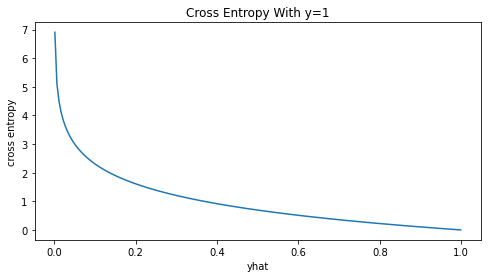

In [ ]:
# Tính cross entropy theo yhat và y
def _cross_entropy(yhat, y):
  return -(y*np.log(yhat)+(1-y)*np.log((1-yhat)))
# Khởi tạo gía trị yhat từ 0 đến 1
yhat = np.linspace(0.001, 0.999, 200)

# Hàm visualize cross entropy
def _plot_crs(yhat, y):
  cross_entropy = _cross_entropy(yhat, y)
  plt.figure(figsize = (8, 4))
  plt.plot(yhat, cross_entropy)
  plt.xlabel('yhat')
  plt.ylabel('cross entropy')
  plt.title('Cross Entropy With y={}'.format(y))
  plt.show()

_plot_crs(yhat, y=1)

* Trường hợp $y=0$

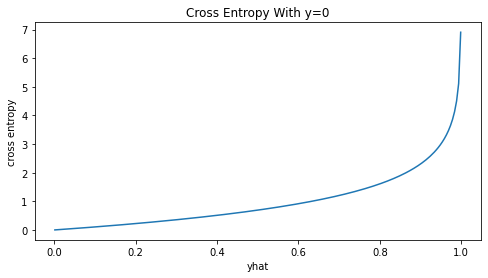

In [ ]:
_plot_crs(yhat, y=0)

* Trường hợp $y=0.5$

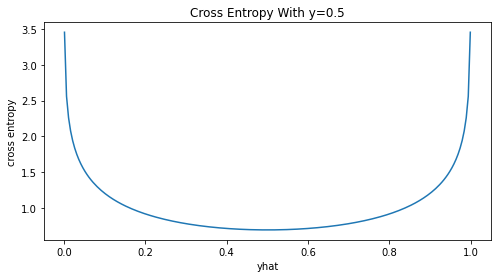

In [ ]:
_plot_crs(yhat, y=0.5)

Biểu đồ chung cho cả 3 trường hợp

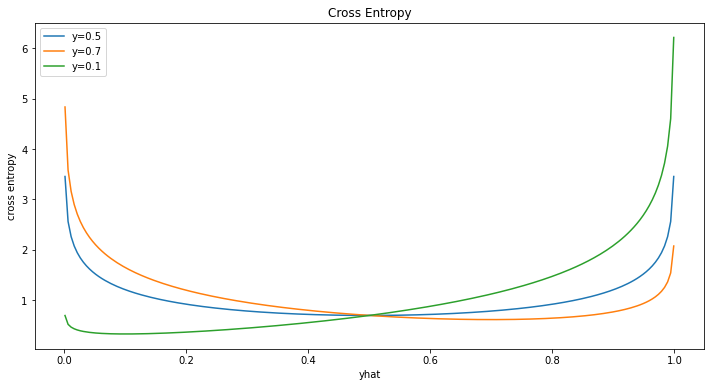

In [ ]:
crs1 = _cross_entropy(yhat, y=0.5)
crs2 = _cross_entropy(yhat, y=0.7)
crs3 = _cross_entropy(yhat, y=0.1)
plt.figure(figsize = (12, 6))
plt.plot(yhat, crs1, label='y=0.5')
plt.plot(yhat, crs2, label='y=0.7')
plt.plot(yhat, crs3, label='y=0.1')
plt.xlabel('yhat')
plt.ylabel('cross entropy')
plt.title('Cross Entropy')
plt.legend(loc='best')
plt.show()

Như vậy ta nhận thấy giá trị cực tiểu của hàm cross entropy luôn đạt được tại $y=\hat{y}$

## 2.5. Điều kiện cực trị của Cross Entropy

Để chứng minh cho nhận định giá trị của _Cross Entropy_ đạt cực tiểu tại $y = \hat{y}$ không quá khó. Ở phần này tôi sẽ đưa ra một chứng minh trực quan cho bạn nào yêu toán bằng phương pháp Lagrange. Đối với những bạn không thực sự quan tâm tới toán có thể bỏ qua.


### 2.5.1. Phương pháp nhân tử Lagrange (_Lagrange multiplier_)

Để giải bài toán cực trị của hàm _Cross Entropy_ thì chúng ta phải làm quen với phương pháp _nhân tử Lagrange_ trong tối ưu. Đây là một phương pháp giúp tìm kiếm cực trị địa phương cho các hàm mục tiêu $f(\mathbf{x})$ đi kèm với điều kiện ràng buộc là những đẳng thức hoặc bất đẳng thức đối với $\mathbf{x}$. Ví dụ về bài toán tối ưu với điều kiện ràng buộc:

$$\mathbf{x} = \arg \min_{\mathbf{x}} f(\mathbf{x})$$

Thoả mãn: $g(\mathbf{x}) = 0$

Trong đó $g(\mathbf{x}) = 0$ được gọi là điều kiện ràng buộc. Một bài toán có thể có một hoặc nhiều điều kiện ràng buộc. Chúng ta gọi chung những điều kiện mà $\mathbf{x}$ cần thoả mãn là hệ điều kiện ràng buộc.

Ý tưởng của phương pháp _nhân tử Lagrange_ là chuyển từ bài toán ràng buộc sang bài toán không ràng buộc và sử dụng khảo sát đạo hàm bậc nhất hàm Lagrange có dạng:

$$\mathcal{L}(\lambda, x_1, x_2) = f(\mathbf{x}) + \lambda g(\mathbf{x})$$.

với $\lambda \geq 0$.

Thông qua tính đạo hàm bậc nhất theo $\lambda$ thì các điều kiện ràng buộc sẽ được thoả mãn. Do đó chúng ta không cần thêm điều kiện ràng buộc. Bên dưới là ứng dụng của phương pháp nhân tử Lagrange để giải bài toán tối ưu  



### 2.5.2. Điều kiện để Cross Entropy là cực trị

Giả sử $\mathbf{y} = [y_1, ..., y_C]$ là phân phối xác suất ground truth đã biết và $\hat{\mathbf{y}} = [\hat{y}_1, \dots , \hat{y}_C]$ là phân phối xác suất dự báo thỏa mãn điều kiện ràng buộc $\sum_{i=1}^{C} \hat{y}_i = 1$. Tìm nghiệm tối ưu của hàm cross entropy:

$$f(\mathbf{\hat{y}},\mathbf{y}) = \sum_{i=1}^C {-y_i\log(\hat{y_i})}$$

Ta có hàm lagrange:

$$\begin{eqnarray}\mathcal{L}(\lambda, \mathbf{\hat{y}}) & = & f(\mathbf{\hat{y}},\mathbf{y}) + \lambda (1-\sum_{i=1}^{C} \hat{y}_i) \\
& = & \sum_{i=1}^C {-y_i\log(\hat{y_i})} + \lambda (1-\sum_{i=1}^{C} \hat{y}_i) \end{eqnarray}$$.

Hệ phương trình đạo hàm bậc nhất theo các biến $\hat{y}_i, \lambda$ ta được:


$$
\left\{
\begin{matrix}
    \nabla_{\hat{y}_i} \mathcal{L}(\lambda, \mathbf{\hat{y}}) &=& - {\frac{y_i}{\hat{y_i}}} - \lambda~~~ &, \forall i=\overline{1, C} ~~~ \\
    \nabla_{\lambda} \mathcal{L}(\lambda, \mathbf{\hat{y}}) &=& 1-\sum_{i=1}^{C} \hat{y}_i & ~~~ 
\end{matrix}
\right.$$

Giải phương trình đạo hàm bậc nhất bằng 0 ta suy ra nghiệm $y_i = \hat{y}_i, \forall i=\overline{1, C}$. Tức là phân phối xác suất dự báo $\hat{\mathbf{y}}$ phải bằng ground truth $\mathbf{y}$. Đây chính là lý do vì sao chúng ta coi _Cross Entropy_ là một độ đo mức độ tương đồng giữa phân phối xác suất của giá trị dự báo và ground truth.

# 3. Tìm nghiệm tối ưu bằng hạ dốc (_gradient descent_)

Phương pháp hạ dốc (_gradient descent_) là một kỹ thuật quan trọng trong học máy và đặc biệt là học sâu, giúp ta tìm cực trị địa phương của mọi hàm số dựa trên gradient. Trên thực tế việc tìm ra được lời giải chính xác cho một số dạng hàm mất mát là không dễ dàng, đặc biệt là những hàm số có đạo hàm quá phức tạp và những hàm không lồi. Do đó _phương pháp hạ dốc_ là một trong những lựa chọn tốt nhất để tiến dần đến cực trị cho những bài toán như vậy. Tuy nhiên hạn chế của phương pháp này đó là cực trị tìm được chỉ là nghiệm gần đúng và không đảm bảo chắc chắn là cực trị toàn cục. 

Để hiểu về phương pháp hạ dốc là gì chúng ta sẽ cùng phân tích một ví dụ đơn giản đó là bài toán tìm cực trị của hàm $f(x) = x^2-2x+5$ .

Hàm này có đạo hàm là $f'(x) = 2x-2$

Không khó để phát hiện ra $f'(x)$ có nghiệm $x=1$ và là hàm lồi tại nghiệm đó nên nó có cực tiểu là $(x*, y*)=(1, 5)$.

Tiếp theo ta sẽ vẽ đồ thị của hàm số này.



In [ ]:
import numpy as np

# Khởi tạo x
x = np.arange(-9, 11, 0.1)

def _f(x):
  return x**2-2*x+5

# Tính f(x)
y = _f(x)
# Đạo hàm f'(x)
y_grad = 2*x-2

# Lấy ra các điểm ngẫu nhiên
x0, y0 = x[10], y[10]
x1, y1 = x[-20], y[-20]

# Cực tiểu của hàm số
x_star=1
y_star=4

Vẽ đồ thị

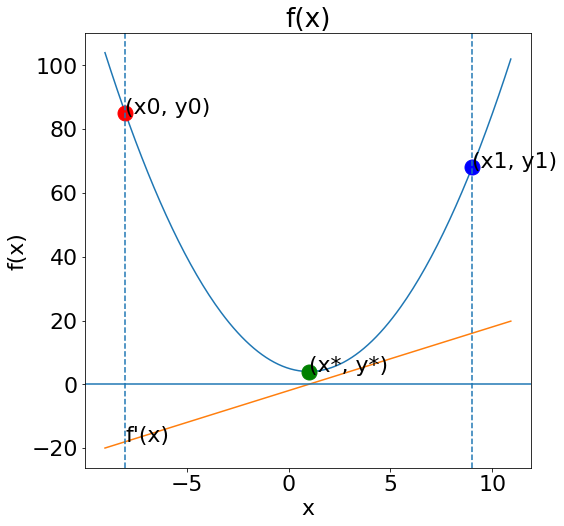

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.ylabel("f(x)")
plt.plot(x0, y0, marker="o", markersize=15, color="red")
plt.text(x0, y0, "(x0, y0)")
plt.plot(x1, y1, marker="o", markersize=15, color="blue")
plt.text(x1, y1, "(x1, y1)")
plt.text(x_star, y_star, "(x*, y*)")
plt.plot(x_star, y_star, marker="o", markersize=15, color="green")
plt.plot(x, y_grad, linestyle='-')
plt.axhline(0)
plt.axvline(x0, linestyle="--")
plt.axvline(x1, linestyle="--")
plt.text(x0, 2*x0-2, "f'(x)")
plt.xlabel("x")
plt.title("f(x)")
plt.show()

Từ đồ thị ta thấy điểm $(x_0, y_0)$ nằm ở bên trái điểm cực tiểu thì giá trị đạo hàm là âm. Để di chuyển tới $(x*, y*)$ thì ta phải **tăng** $x_0$.

Tương tự tại điểm $(x_1, y_1)$ nằm bên phải của điểm cực tiểu thì giá trị của đạo hàm sẽ dương. Để đi tới $(x*, y*)$ thì cần **giảm** $x_1$.

Như vậy trong cả hai trường hợp ta đều cần di chuyển ngược chiều đạo hàm để tiến tới gần hơn với cực trị. Ta có thể cập nhật dần dần nghiệm sau mỗi bước bằng một hệ số học tập (_learning rate_) $\alpha$ có dạng như sau:

$$x_{new} = x_0-\alpha \nabla_{x_0} f(x_0)$$


Như vậy tại mọi vị trí, chỉ cần di chuyển ngược chiều của đạo hàm tại một điểm  một khoảng rất nhỏ thì **có khả năng rất cao** là ta sẽ thu được một giá trị nhỏ nhơn. 

Thế nhưng có khi nào di chuyển ngược chiều đạo hàm mà khiến giá trị $f(x)$ lớn hơn không? Đó là khi ta đã vượt dốc, chẳng hạn như khi đã đến rất gần điểm cực trị $(x^*, y^*)$ nhưng _hệ số học tập_ quá lớn làm cho khoảng thay đổi ở bước tiếp theo cũng lớn theo và là nguyên nhân khiến nghiệm cập nhật vượt quá điểm cực trị. Trường hợp này gọi là nhảy dốc (_StepOver_).


![](https://i.imgur.com/0g58QdZ.jpeg.jpeg)

**Hình 2:** Hình bên trái là chiến lược học tập được thiết lập với hệ số học tập phù hợp. Hình bên phải xảy ra hiện tượng _nhảy dốc_. Sau mỗi lượt cập nhật nghiệm thì các điểm có xu hướng nhảy qua lại hai bên xung quanh cực trị địa phương thay vì hội tụ từ từ.

Để hạn chế hiện tượng _nhảy dốc_ thì ta cần lựa chọn $\alpha$ rất nhỏ từ $0.001$ tới $0.005$ và áp dụng những phương pháp tối ưu (_optimizer_) khác nhau để kiểm soát quá trình huấn luyện. Một số phương pháp tối ưu phổ biến là `Adam, Ada, RMProp, ...` và hiện chúng đều đã có sẵn trong các framework Deep Learning.





## 3.1. Cập nhật gradient descent trên Logistic regression

Để tìm ra nghiệm của hồi qui Logistic thì chúng ta sẽ thực hiện cập nhật nghiệm trên từng điểm dữ liệu $(\mathbf{x}_i, y_i)$. Các điểm được lựa chọn một cách ngẫu nhiên ở mỗi lượt cập nhật. Phương pháp cập nhật gradient descent như vậy còn được gọi là _Stochastic Gradient Descent_.

$$\mathbf{w} := \mathbf{w} - \alpha ~ \frac{\delta \mathcal{L}(\mathbf{w}; \mathbf{x}_i, y_i)}{\delta \mathbf{w}} \tag{3}$$


Mặt khác:

$$\mathcal{L}(\mathbf{w}; \mathbf{x}_i, y_i) = -[y_i \log {\hat{y}}_i + (1-y_i) \log (1 - \hat{y}_i)]$$

Ngoài ra ta dễ dàng chứng minh được:

$$\begin{eqnarray}\frac{\delta \mathcal{L}(\mathbf{w}; \mathbf{x}_i, y_i)}{\delta \mathbf{w}} & = & -[y_i \frac{\delta \log {\hat{y}}_i}{\delta \mathbf{w}} + (1-y_i) \frac{\delta \log {(1-\hat{y}}_i)}{\delta \mathbf{w}}] \\
& = & -[y_i \frac{\delta \log \hat{y}_i}{\delta \hat{y}_i}\frac{\delta \hat{y}_i}{\delta \mathbf{w}} + (1-y_i) \frac{\delta \log {(1-\hat{y}}_i)}{\delta \hat{y}_i} \frac{\delta \hat{y}_i}{\delta \mathbf{w}}] \\
& = & -[y_i \frac{1}{\hat{y}_i} - (1-y_i) \frac{1}{(1-\hat{y}_i)}] \frac{\delta \hat{y}_i}{\delta \mathbf{w}} \\
& = & - [\frac{y_i-\hat{y}_i}{\hat{y}_i(1-\hat{y}_i)}] \frac{\delta \hat{y}_i}{\delta \mathbf{w}} \tag{4}
\end{eqnarray}$$

Dòng 1 suy ra dòng 2 là vì ta sử dụng công thức vi phân. Đặt $z = e^{\mathbf{w}^{\intercal} \mathbf{x}}$. Tiếp tục khai triển:

$$\frac{\delta \hat{y}_i}{\delta \mathbf{w}} = \frac{\delta \frac{1}{1+z_i}}{\delta \mathbf{w}} = \frac{\delta \frac{1}{1+z_i}}{\delta z_i} \frac{\delta z_i}{\delta \mathbf{w}} = \frac{-1}{(1+z_i)^2} z_i\mathbf{x}_i = -\mathbf{x}\frac{z_i}{(1+z_i)^2} = -\mathbf{x}_i\hat{y}_i(1-\hat{y}_i)$$

Từ đó thế vào $(4)$ ta được:

$$\frac{\delta \mathcal{L}(\mathbf{w}; \mathbf{x}_i, y_i)}{\delta \mathbf{w}} = \mathbf{x}_i (\hat{y}_i-y_i)$$

Như vậy công thức $(3)$ cập nhật nghiệm theo gradient descent sẽ được rút ngắn xuống thành:

$$\mathbf{w} := \mathbf{w} - \alpha ~ \mathbf{x}_i(\hat{y}_i-y_i)$$





# 4. Hồi qui Logistic trên sklearn

Để xây dựng mô hình hồi qui Logistic trên sklearn chúng ta sử dụng module `sklearn.linear_model.LogisticRegression`.

Tiếp theo chúng ta sẽ cùng xây dựng một pipeline đơn giản cho bài toán phân loại nợ xấu sử dụng mô hình hồi qui Logistic. Dữ liệu đầu vào là [hmeq](http://www.creditriskanalytics.net/uploads/1/9/5/1/19511601/hmeq.csv). Bộ dữ liệu HMEQ bao gồm các đặc trưng thông tin về nợ của 5960 khoản vay mua nhà. Đây là những khoản vay mua nhà mà người vay sử dụng vốn chủ sở hữu làm tài sản thế chấp. Tập dữ liệu bao gồm những trường sau:

* BAD: 1 = Hồ sơ vay là vi phạm hoặc mất khả năng trả nợ; 0 = hồ sơ vay đã và đang trả nợ.
* LOAN: Số tiền yêu cầu cho vay.
* MORTDUE: Số tiền đến hạn của khoản thế chấp hiện có.
* VALUE: Giá trị tài sản hiện tại.
* REASON: DebtCon = nợ hợp nhất; HomeImp = cải thiện nhà.
* JOB: Thể loại nghề nghiệp.
* YOJ: Số năm kinh nghiệm trong nghề nghiệp hiện tại.
* DEROG: Số lượng báo cáo không tín nhiệm.
* DELINQ: Số hạn mức tín dụng quá hạn.
* CLAGE: Tuổi của hạn mức tín dụng cũ nhất tính theo tháng.
* NINQ: Số câu hỏi tín dụng gần đây.
* CLNO: Số lượng hạn mức tín dụng.
* DEBTINC: Tỷ lệ nợ trên thu nhập.

Mục tiêu của chúng ta sẽ là dựa vào các biến đầu vào để phân loại một hồ sơ có khả năng nợ xấu hay không.

Như thông lệ, qui trình xây dựng mô hình sẽ bao gồm các bước theo tuần tự:

1. Khảo sát dữ liệu.
2. Phân chia tập huấn luyện/kiểm tra.
3. Xử lý missing và outliers.
4. Lựa chọn mô hình.
5. Huấn luyện mô hình.
6. Đánh giá mô hình.

Bên dưới chúng ta sẽ tuần tự thực hành những bước này:

# New Section

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

Đọc dữ liệu từ pandas

In [ ]:
import pandas as pd

df = pd.read_csv('http://www.creditriskanalytics.net/uploads/1/9/5/1/19511601/hmeq.csv', header = 0, sep = ',')
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


Vẽ biểu đồ khảo sát phân phối của dữ liệu.

number of numeric field:  11
Error CLNO


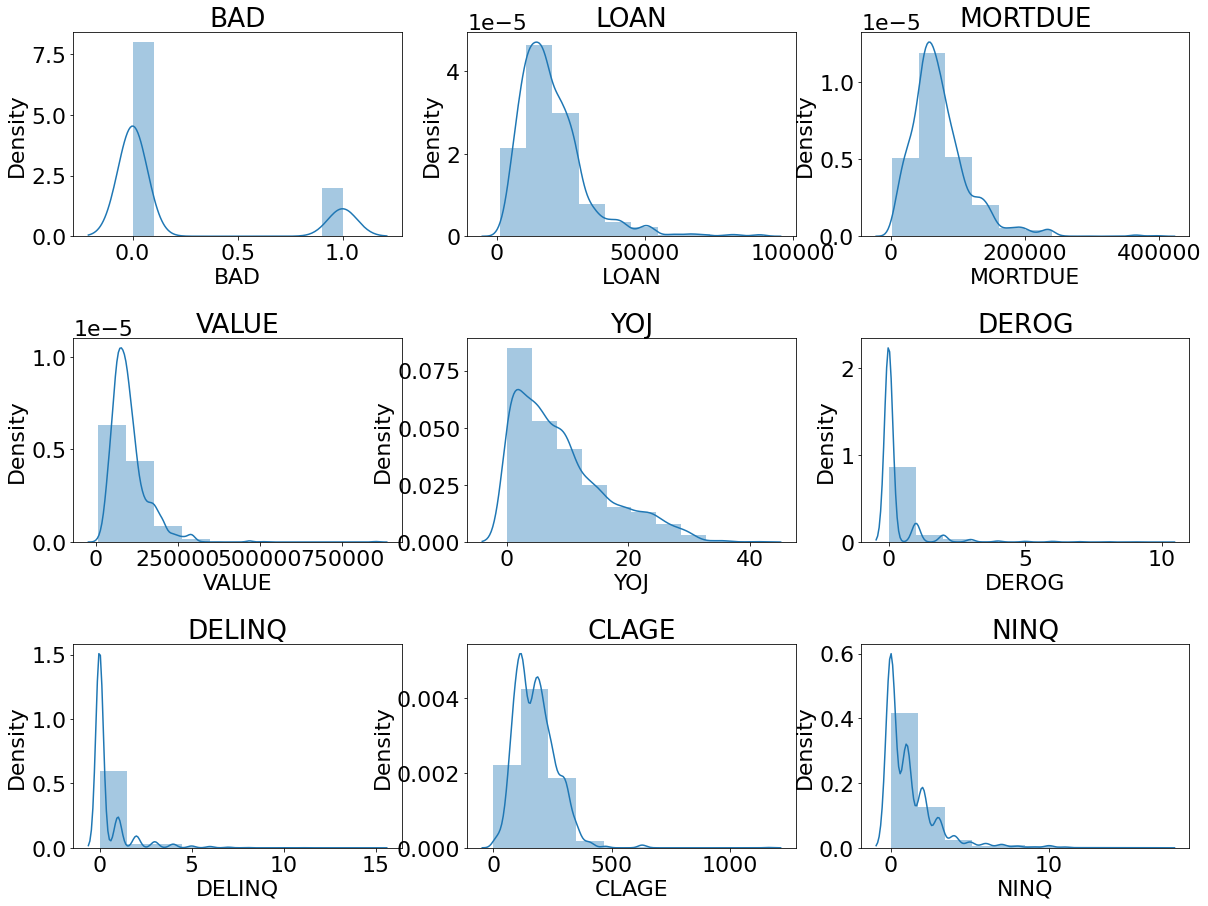

In [ ]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

numeric_cols = df.select_dtypes(include=['float','int']).columns

def _plot_numeric_classes(df, col, bins=10, hist=True, kde=True):
    sns.distplot(df[col],
                 bins = bins,
                 hist = hist,
                 kde = kde)

def _distribution_numeric(df, numeric_cols, row=3, col=3, figsize=(20, 15), bins = 10):
    '''
    numeric_cols: list các tên cột
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    bins: số lượng bins phân chia trong biểu đồ distribution
    '''
    print('number of numeric field: ', len(numeric_cols))
    assert row*(col-1) < len(numeric_cols)
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(df, numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break

_distribution_numeric(df, numeric_cols)

number of category field:  2


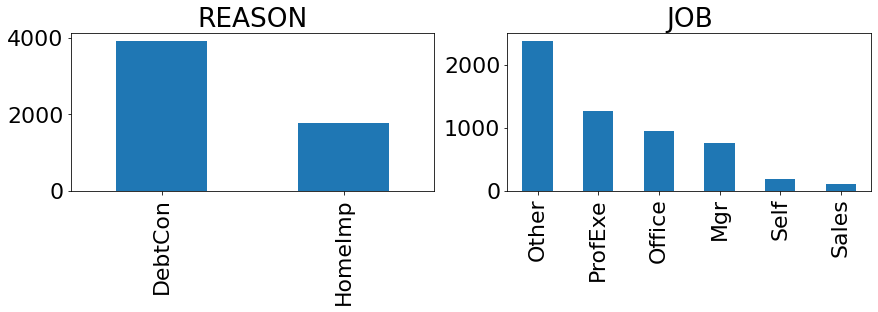

In [ ]:
# Đối với biến phân loại
cate_cols = df.select_dtypes('O').columns

def _plot_bar_classes(df, cols):
    df[cols].value_counts().plot.bar()

def _distribution_cate(df, cate_cols, row = 1, col = 2, figsize = (20, 5)):
  '''
  cate_cols: list các tên cột
  row: số lượng dòng trong lưới đồ thị
  col: số lượng cột trong lưới đồ thị
  figsize: kích thước biểu đồ
  '''
  print('number of category field: ', len(cate_cols))
  plt.figure(figsize = figsize)
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)    
  for i in range(1, len(cate_cols)+1, 1):
    try:
      plt.subplot(row, col, i)
      _plot_bar_classes(df, cate_cols[i-1])
      plt.title(cate_cols[i-1])
    except:
      break

_distribution_cate(df, cate_cols, row = 4, col = 4, figsize = (30, 16))

Phân chia tập huấn luyện/kiểm tra.

In [ ]:
# Chia train/test theo tỷ lệ 80:20.
df_train, df_test = train_test_split(df, test_size=0.2, stratify = df['BAD'])
X_train = df_train.copy()
y_train = X_train.pop("BAD")

X_test = df_test.copy()
y_test = X_test.pop("BAD")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4768, 12) (4768,)
(1192, 12) (1192,)


Xây dựng pipeline xử lý missing data và outliers.

In [ ]:
# Lấy list names của các biến phân loại và biến liên tục.
cat_names = list(X_train.select_dtypes('object').columns)
num_names = list(X_train.select_dtypes(['float', 'int']).columns)

In [ ]:
# Pipeline xử lý cho biến phân loại
cat_pl= Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')), # Xử lý missing data bằng cách thay thế most frequent
        ('onehot', OneHotEncoder()), # Biến đổi giá trị của biến phân loại thành véc tơ OneHot
    ]
)

In [ ]:
# Pipeline xử lý cho biến liên tục
num_pl = Pipeline(
    steps=[
           ('imputer', KNNImputer(n_neighbors=7)), # Xử lý missing data bằng cách dự báo KNN với n=7.
           ('scaler', MinMaxScaler()) # Xử lý missing data bằng MinMax scaler
    ]
)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pl, num_names), # áp dụng pipeline cho biến liên tục
        ('cat', cat_pl, cat_names), # áp dụng pipeline cho biến phân loại
    ]
)

Huấn luyện mô hình trên tập huấn luyện và đánh giá trên tập kiểm tra. Ở bước này chúng ta lưu ý một chút về các lựa chọn của LogisticRegression.

```
LogisticRegression(penalty='l2',
tol=0.0001, 
C=1.0, 
fit_intercept=True, 
class_weight=None, 
solver='lbfgs', 
max_iter=100)
```
Trong đó:

* `tot` là giá trị bao dung (_tolarance_) để dừng cập nhật gradient descent nếu khoảng thay đổi của hàm mất mát sau một bước huấn luyện nhỏ hơn `tot`.
* `max_iter` là số lượt huấn luyện tối đa.
* `fit_intercept` để qui định có sử dụng trọng số tự do (chính là $w_0$ không bị phụ thuộc vào dữ liệu) hay không.
* `solver` là phương pháp để giải bài toán tối ưu đối với cross entropy. Trong đó có: `liblinear, sag, saga, newton-cg`. Đối với dữ liệu kích thước nhỏ thì `liblinear` sử dụng sẽ phù hợp hơn. Trái lại `sag`, `saga` có tốc độ huấn luyện nhanh hơn cho dữ liệu lớn.
* `penalty`: là dạng hàm được sử dụng làm thành phần điều chuẩn (_regularization term_).
* `C`: Hệ số nhân của thành phần điều chuẩn.
* `class_weight`: Trọng số được nhân thêm ở mỗi nhóm. Thường được sử dụng trong trường hợp mẫu mất cân bằng giữa các nhóm để dự báo nhóm thiểu số tốt hơn. Trong số có tác dụng điều chỉnh mức độ phạt nếu dự báo sai một mẫu theo nhãn ground truth của mẫu. Nếu không được xác định thì ta hiểu trọng số nhóm là cân bằng.

In [ ]:
# Completed training pipeline
completed_pl = Pipeline(
    steps=[
            ("preprocessor", preprocessor), 
            ("classifier", LogisticRegression(penalty='l2', C=0.5, max_iter=200, class_weight=[0.3, 0.7]))
    ]
)

# training
completed_pl.fit(X_train, y_train)

# accuracy
y_train_pred = completed_pl.predict(X_train)
print(f"Accuracy on train: {accuracy_score(list(y_train), list(y_train_pred)):.2f}")

y_pred = completed_pl.predict(X_test)
print(f"Accuracy on test: {accuracy_score(list(y_test), list(y_pred)):.2f}")

Accuracy on train: 0.83
Accuracy on test: 0.82


Kết quả mô hình đạt accuracy là 83% trên tập huấn luyện và 82% trên tập kiểm tra. Đây là một kết quả không quá chênh lệch giữa hai tập dữ liệu nên có thể nói mô hình khá ổn định. Phương pháp hồi qui Logistic thường là phương pháp đơn giản nhất trong các lớp mô hình hồi qui nên kết quả của nó thường không phải là tốt nhất. Bạn đọc nên thử nghiệm với nhiều lớp mô hình khác như `SVM, MLP, kNN, Random Forest, CART, Decision Tree` để tìm ra lớp mô hình phù hợp nhất. 

# 5. Tổng kết

Như vậy ở bài này mình các bạn đã được làm quen với mô hình hồi qui Logistic trong bài toán phân loại nhị phân thuộc lớp mô hình học có giám sát cùng những khái nhiệm liên quan như hàm Sigmoid, ước lượng hợp lý tối đa, hàm Cross Entropy, phương pháp cập nhật nghiệm bằng gradient descent. Đây là những nội dung cơ bản nhưng lại rất quan trọng mà các bạn cần nắm vững để tạo tiền đề học tập và nghiên cứu những phương pháp học máy nâng cao hơn.

# 6. Bài tập

1. Xác suất dự báo của mô hình hồi qui Logistic được xây dựng dựa trên hàm nào? Hàm số đó có đặc điểm gì?
2. Sau khi dự báo được xác suất, chúng ta cần làm gì để tiếp tục suy luận ra nhãn dự báo của một quan sát?
3. Tỷ lệ Odd Ratio có ý nghĩa như thế nào?
4. Đường biên phân chia của hồi qui Logistic có dạng như thế nào?
5. Tính các đạo hàm sau đây theo giá trị của $w_0$ và $w_1$.

$$\frac{1}{1+e^{-(w_0+w_1x_1)}}$$ và

$$\frac{1}{1+e^{(w_0+w_1x_1)}}$$

Nhận xét gì về đạo hàm của hai hàm số này ?

6. Tại sao chúng ta cần thiết lập hệ số học tập (_learning rate_) là một giá trị nhỏ?

7. Phương pháp cập nhật nghiệm theo gradient descent bằng cách lấy ngẫu nhiên một điểm dữ liệu được gọi là gì? Chúng có công thức ra sao?

8. Thế nào là ước lượng hợp lý cực đại?

9. Hàm Cross Entropy là gì ? Ý nghĩa của Crosss Entropy.

10. Tại sao chúng ta không sử dụng hồi qui tuyến tính trong bài toán phân loại?


# 7. Tài liệu tham khảo

1. [Logistic Regression - Joparga Standford](https://joparga3.github.io/standford_logistic_regression/)
2. [Logistic Regression - Jurafsky](https://web.stanford.edu/~jurafsky/slp3/5.pdf)
3. [CS109 - Logistic Regression - StandFord](https://web.stanford.edu/class/archive/cs/cs109/cs109.1176/lectures/23-LogisticRegression.pdf)
4. [Bishop Pattern Recognition and Machine Learning - 2006](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)
5. [C229 - Andrew Ng - Lecture Note](https://datajobs.com/data-science-repo/Generalized-Linear-Models-[Andrew-Ng].pdf)




## 3.1. Phương pháp mini-batch

Kỹ thuật hạ dốc sẽ tìm cách **tiến dần từng bước** tới cực trị địa phương thông qua việc di chuyển ngược chiều của gradient như các bạn có thể thấy ở hình bên dưới.

![](https://imgur.com/9WSUm3h.png)

**Hình 1**: Mô tả các đường di chuyển theo gradient đến điểm cực trị địa phương. Như trong hình chúng ta có thể thấy xuất phát từ các đỉnh của đồ thị, chúng ta có thể dần di chuyển theo gradient descent để hạ thấp dần dần giá trị của hàm số cho tới khi đạt được cực trị địa phương.

Gradient descent cũng tồn tại một số nhược điểm nhất định như:

* Giá trị nghiệm sẽ phụ thuộc vào điểm khởi tạo.
* Nghiệm tìm được chỉ là cực trị địa phương chứ không phải là cực trị toàn cục.


https://web.stanford.edu/~jurafsky/slp3/5.pdf

https://web.stanford.edu/class/archive/cs/cs109/cs109.1176/lectures/23-LogisticRegression.pdf

https://joparga3.github.io/standford_logistic_regression/